In [1]:
from skimage.io import imread, imsave
import pyclesperanto_prototype as cle
import napari
import os
import numpy as np
import pandas as pd
from aicsimageio import AICSImage

08-May-23 23:30:30 - bfio.backends - WARNING  - Java backend is not available. This could be due to a missing dependency (jpype).


In [2]:
def segmentation(image):
    
    #Noise removal
    g_blur = cle.gaussian_blur(image, sigma_x=1, sigma_y=1, sigma_z=1)
    
    #background subtracton
    background_subtracted = cle.top_hat_box(g_blur, radius_x=2.0*2, radius_y=2.0*2, radius_z=2.0*2)
    
    #Segentation
    segmented = cle.voronoi_otsu_labeling(background_subtracted, spot_sigma=2.0, outline_sigma=0.0)
    
    #Exclude small labels
    output_labels = cle.exclude_small_labels(segmented, None, 10.0)
    
    return output_labels

0.15 0.03530556263177937 0.03530556263177937


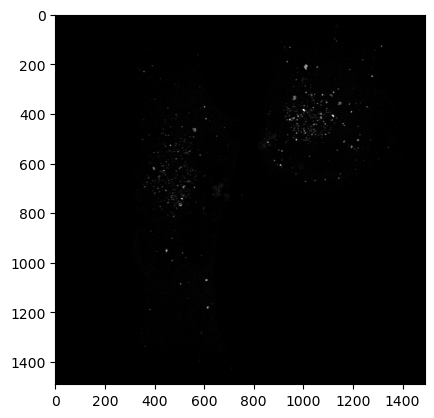

In [3]:
image_path = "C:/Nisarg/Thesis/Data/#4715 - 12.04.2023/#4715_07_W33-M66_CQ-Rapa_zstack_airy.czi"
aics_image = AICSImage(image_path)
full_image = aics_image.get_image_data("ZYX", T=0, C=0)

Voxel_size_z = aics_image.physical_pixel_sizes.Z
Voxel_size_y = aics_image.physical_pixel_sizes.Y
Voxel_size_x = aics_image.physical_pixel_sizes.X
print(Voxel_size_z, Voxel_size_y, Voxel_size_x)

cle.imshow(full_image, labels=False)

(42, 1490, 800)


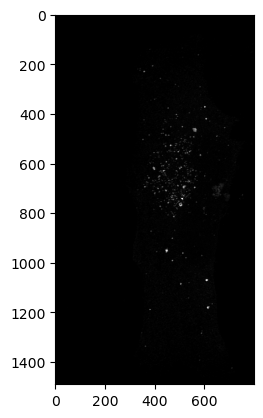

In [4]:
#Crop image to focuss on one cell and speed up processing

image = full_image[:,:,:800] #ZYX [:,1150:1800,:1500]
print(image.shape)
cle.imshow(image, labels=False)

In [5]:
zoom=3 #Maximum upto 4.28 (Voxel.size.z / Voxel.size.x = 4.28)

#Rescale to isotropic
rescaled = cle.scale(image, factor_x= zoom*Voxel_size_x/Voxel_size_z, factor_y= zoom*Voxel_size_y/Voxel_size_z, factor_z= zoom*1.0, auto_size= True)
pixel_volume = pow((Voxel_size_z / zoom), 3)

del image
rescaled.shape

(126, 1052, 565)

In [6]:
labels = segmentation(rescaled)

In [7]:
viewer = napari.Viewer()
viewer.add_image(rescaled)


<Image layer 'rescaled' at 0x2222f13e070>

In [8]:
viewer.add_labels(labels)

<Labels layer 'labels' at 0x2224cd97040>

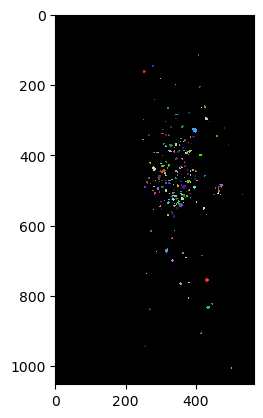

In [9]:
cle.imshow(labels, labels=True)